In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# load data
df = pd.read_csv("./tennis_stats.csv")

In [3]:
# inspect data
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [5]:
# check columns
print(df.columns)

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')


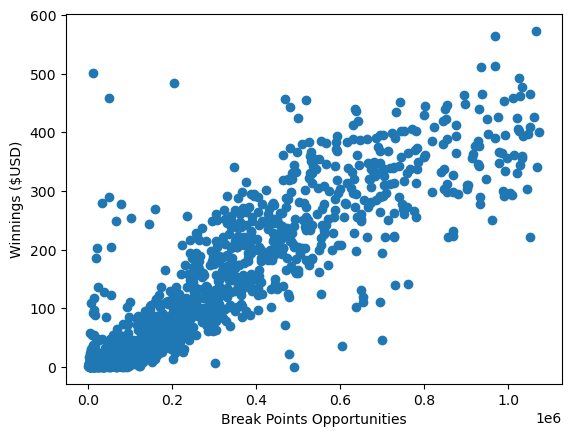

In [32]:
# Evaluate each possible correlations (on scatterplot)
# 1. Aces
# 2. BreakPointsFaced
# 3. BreakPointsOpportunities
# 4. DoubleFaults
# 5. ReturnGamesPlayed
# 6. ServiceGamesPlayed

# Example of scatterplot analysis
plt.scatter(df["Winnings"], df["BreakPointsOpportunities"])
plt.xlabel("Break Points Opportunities")
plt.ylabel("Winnings ($USD)")
plt.show()

In [33]:
# Build single Linear Regression Model

# Single Feature and label
feature = df[['BreakPointsOpportunities']]
label = df[['Winnings']]

In [34]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=100)

In [35]:
# train the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [36]:
# Evaluate score
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print("Training score: " + str(train_score))
print("Test score: " + str(test_score))

Training score: 0.8082722500245938
Test score: 0.8158713995023225


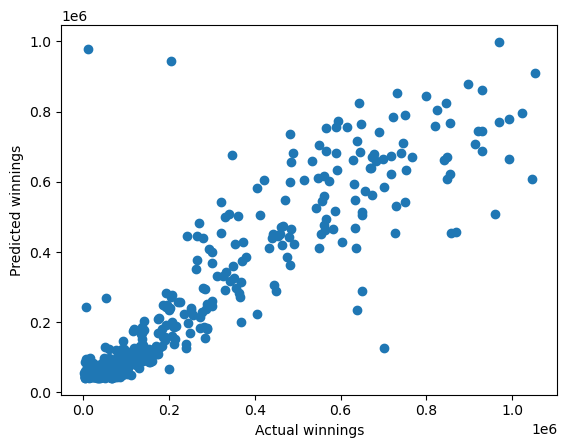

In [39]:
# Evaluate using graph
y_predicted = linreg.predict(x_test)
plt.plot(y_test, y_predicted, 'o')
plt.xlabel("Actual winnings")
plt.ylabel("Predicted winnings")
plt.show()

In [40]:
# Do a few more single Linear Regression to get an idea of most correlated features

# 1
feature = df[['Aces']]
label = df[['Winnings']]
# Split data
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=100)
# train the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Evaluate score
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print("Training score: " + str(train_score))
print("Test score: " + str(test_score))

Training score: 0.6254432961325673
Test score: 0.6658391074247063


In [41]:
# 2
feature = df[['BreakPointsFaced']]
label = df[['Winnings']]
# Split data
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=100)
# train the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Evaluate score
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print("Training score: " + str(train_score))
print("Test score: " + str(test_score))

Training score: 0.7550829718558374
Test score: 0.7973920931469505


In [42]:
# 3
feature = df[['DoubleFaults']]
label = df[['Winnings']]
# Split data
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=100)
# train the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Evaluate score
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print("Training score: " + str(train_score))
print("Test score: " + str(test_score))

Training score: 0.7134637741009047
Test score: 0.7728782607673913


In [43]:
# 4
feature = df[['ReturnGamesPlayed']]
label = df[['Winnings']]
# Split data
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=100)
# train the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Evaluate score
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print("Training score: " + str(train_score))
print("Test score: " + str(test_score))

Training score: 0.8263457262960543
Test score: 0.8485410465549851


In [44]:
# 5
feature = df[['ServiceGamesPlayed']]
label = df[['Winnings']]
# Split data
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=100)
# train the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Evaluate score
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print("Training score: " + str(train_score))
print("Test score: " + str(test_score))

Training score: 0.8269413541180664
Test score: 0.8494525340509761


In [48]:
# Lists of features with high scores
# 1. ServiceGamesPlayed
# 2. ReturnGamesPlayed
# 3. BreakPointFaced
# 4. BreakPointsOpportunities

In [50]:
# Combine two features and create 3D linreg model
# 1

feature = df[['ServiceGamesPlayed', 'ReturnGamesPlayed']]
label = df[['Winnings']]
# Split data
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=100)
# train the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Evaluate score
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print("Training score: " + str(train_score))
print("Test score: " + str(test_score))


Training score: 0.827043883196638
Test score: 0.8497547816394669


In [51]:
# 2
feature = df[['BreakPointsFaced', 'BreakPointsOpportunities']]
label = df[['Winnings']]
# Split data
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=100)
# train the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Evaluate score
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print("Training score: " + str(train_score))
print("Test score: " + str(test_score))

Training score: 0.8088275092415136
Test score: 0.8127531654655715


In [67]:
# Multiples Linreg model
feature = df[['ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsFaced', 'Wins', 'Losses']]
label = df[['Winnings']]
# Split data
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=100)
# train the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Evaluate score
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print("Training score: " + str(train_score))
print("Test score: " + str(test_score))

Training score: 0.8576836959092142
Test score: 0.8844780598403726


In [62]:

# All features into linreg model
feature = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
              'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
              'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
              'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
              'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
              'TotalServicePointsWon']]
label = df[['Winnings']]
# Split data
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=100)
# train the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Evaluate score
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print("Training score: " + str(train_score))
print("Test score: " + str(test_score))

Training score: 0.8405754357047147
Test score: 0.836794062314953


In [68]:
# In conclusion, using features: 'ServiceGamesPlayed', 'ReturnGamesPlayed', 'BreakPointsFaced', 'Wins', 'Loses'
# yield the highest accuracy of:
#                         Training Score: 85.7%
#                         Test Score: 88.4%